In [6]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [7]:
group_2 = [
    'vk_2_eg', 'stahl_folder', 'r707lv_f4032', 
    'r707lv_f4034', 'r707lv_vari_air', 'og_3'
]

## Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

### 30T

In [8]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.075, 0.117) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.192, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

In [9]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('og_3_30T', 30, True)

Iter 1 , Loss = 1.5561825754656902 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.5261352177599639 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.4993586721235204 , Noise = 0.5982615947723389
Iter 4 , Loss = 1.4741116877837712 , Noise = 0.5545804500579834
Iter 5 , Loss = 1.4493615907737805 , Noise = 0.5134803056716919
Iter 6 , Loss = 1.4294703420348078 , Noise = 0.47495847940444946
Iter 7 , Loss = 1.410089827914564 , Noise = 0.43908920884132385
Iter 8 , Loss = 1.3924342018899107 , Noise = 0.4058893024921417
Iter 9 , Loss = 1.3745042402002994 , Noise = 0.37536031007766724
Iter 10 , Loss = 1.3633696869052538 , Noise = 0.34742191433906555
Iter 11 , Loss = 1.348242997449481 , Noise = 0.32215169072151184
Iter 12 , Loss = 1.342899097295114 , Noise = 0.29938504099845886
Iter 13 , Loss = 1.3132533684705703 , Noise = 0.27921193838119507
Iter 14 , Loss = 1.322967769327903 , Noise = 0.2608789801597595
Iter 15 , Loss = 1.305172564274863 , Noise = 0.24483120441436768
Iter 16 , Loss = 1.298833943518

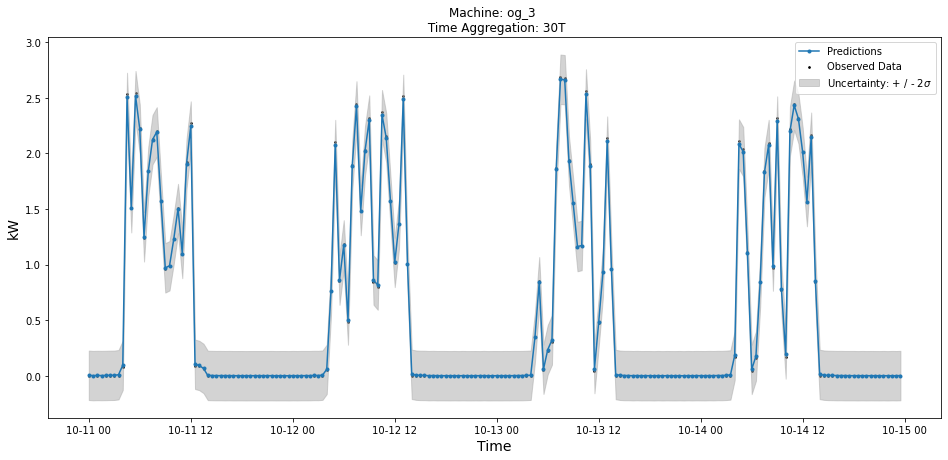

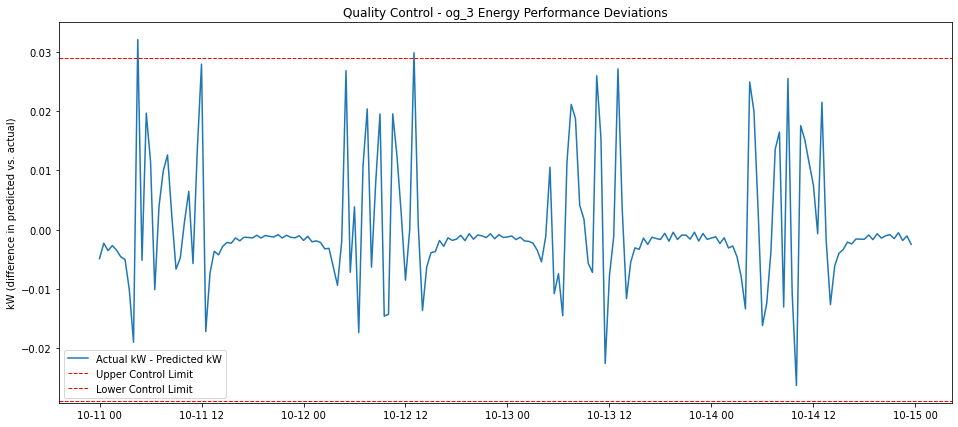

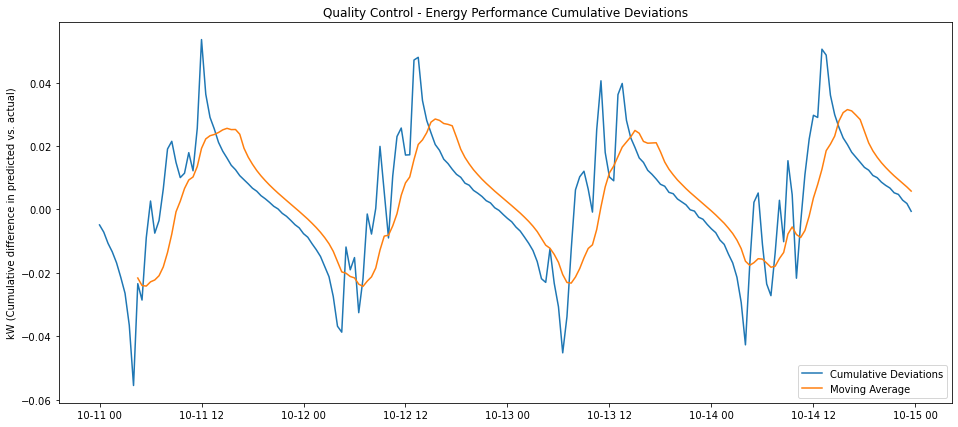

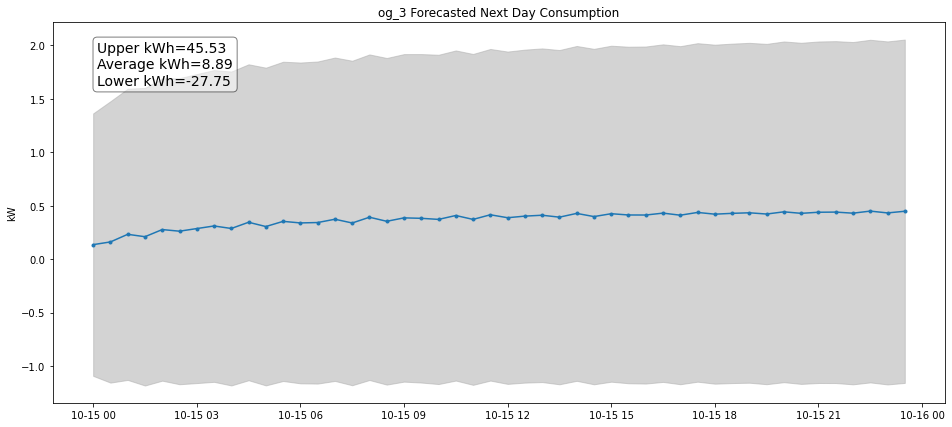

In [10]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='og_3',
    update_score=False
)   

In [11]:
mse, mape

(0.79429443555255, 1776.8934689815596)